<a href="https://colab.research.google.com/drive/1AsESMFjOKGqysrOtKbWHTIaAVA7StYE6?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install corner

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform
import corner

In [3]:
z,hz,hzerr=np.loadtxt("https://raw.githubusercontent.com/darshanbeniwal/Astrophy_Py_STACUP_BDU_CUTN_IUCAA_2023/main/Text_files_Datasets/Hubble_30.txt",unpack=True)

In [4]:
def likelihood(theta, z,hz,hzerr):
    h0, om= theta
    model = h0*np.sqrt(om*(1+z)**3+1-om)
    return (np.sum(-0.5*((hz-model)/hzerr)**2-0.5*np.log(2*np.pi*hzerr**2)))

In [5]:
def prior(theta):
    h0, om= theta
    if 50.0< h0 < 80 and 0.15 < om < 0.55:
        return np.log10(1.0 / ((80 - 50.0) * (0.55 - 0.15)))
    return -np.inf

In [6]:
def posterior(theta, z,hz,hzerr):
    lp = prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp + likelihood(theta, z,hz,hzerr))

In [7]:
def Metropolis_Hastings(parameter_init, nsteps):
    result = []  # List to store the sampled parameter values
    result.append(parameter_init)  # Add the initial parameter values to the result list
    for t in range(nsteps):  # Iterate over the specified number of steps
        step_var = [1, 0.1]  # Variance of the proposal distribution for each parameter
        proposal = norm.rvs(loc=result[-1], scale=step_var)  # Generate a proposal parameter value from a normal distribution
        probability = np.exp(posterior(proposal,z,hz,hzerr) - posterior(result[-1],z,hz,hzerr))  # Calculate the acceptance probability
        if (uniform.rvs() < probability):  # Accept the proposal with the acceptance probability
            result.append(proposal)  # Add the proposal to the result list
        else:
            result.append(result[-1])  # Reject the proposal and add the previous parameter value to the result list
    return(result)  # Return the sampled parameter values

In [9]:
h0_ini,om_ini=60,0.25
initials=h0_ini,om_ini
ndim=2
nsteps=1000000

In [10]:
result = Metropolis_Hastings(initials, nsteps)
samples_MH=np.array(result)
#will take around 26 sec if nsteps=1L
#will take around 3 minutes if nsteps=10L

Text(0, 0.5, '$\\Omega_{m0}$')

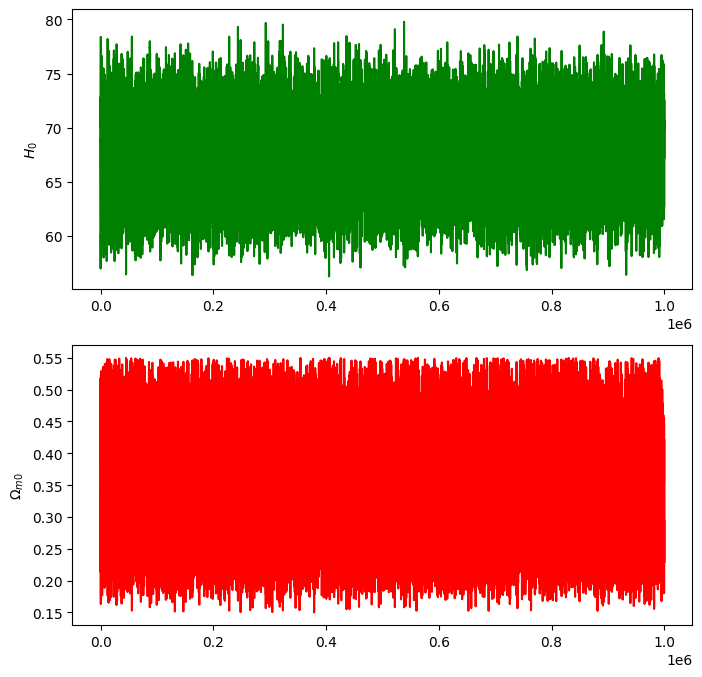

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples = samples_MH.T

# Plot the traceplot of H0
axes[0].plot(samples[0], "g")
axes[0].set_ylabel("$H_0$")

# Plot the traceplot of Om
axes[1].plot(samples[1], "r")
axes[1].set_ylabel("$\Omega_{m0}$")

In [15]:
nburn_in=1000
result_b = result[nburn_in:]
samples_MH_b=np.array(result_b)

Text(0, 0.5, '$\\Omega_{m0}$')

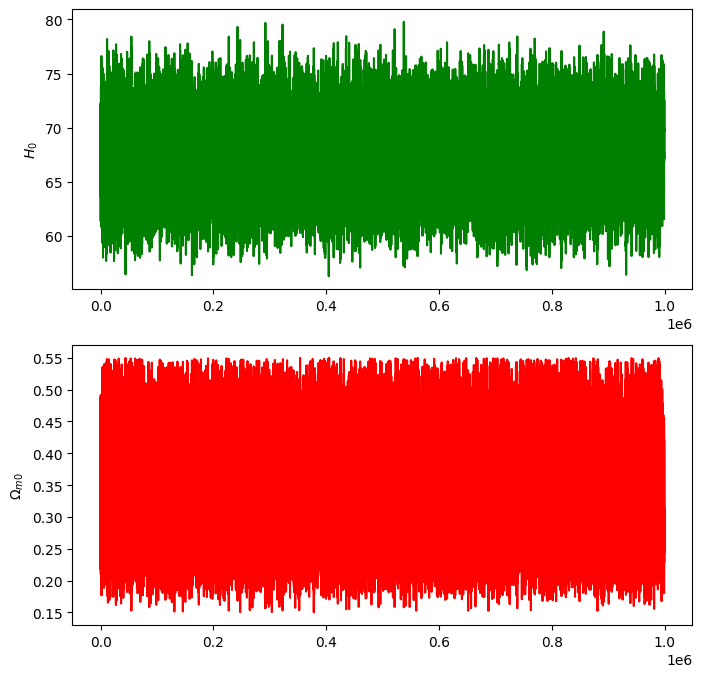

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples_b = samples_MH_b.T

# Plot the traceplot of H0
axes[0].plot(samples_b[0], "g")
axes[0].set_ylabel("$H_0$")

# Plot the traceplot of Om
axes[1].plot(samples_b[1], "r")
axes[1].set_ylabel("$\Omega_{m0}$")


In [17]:
h0_chain=samples_MH_b[:,0]
om_chain=samples_MH_b[:,1]
#Estimate the mean of a and b chains
h0_best = np.mean(h0_chain)
om_best = np.mean(om_chain)

#Estimate the Std. Deviation of a and b chains

sig_h0 = np.std(h0_chain)
sig_om = np.std(om_chain)

print("Best fit values:")
print("H0:",h0_best, "Sig_h0:", sig_h0)
print("Om:",om_best, "Sig_om:", sig_om)

Best fit values:
H0: 67.7627684977509 Sig_h0: 3.0606090241586257
Om: 0.3314790817182971 Sig_om: 0.06107929777841958


Text(0, 0.5, 'Count')

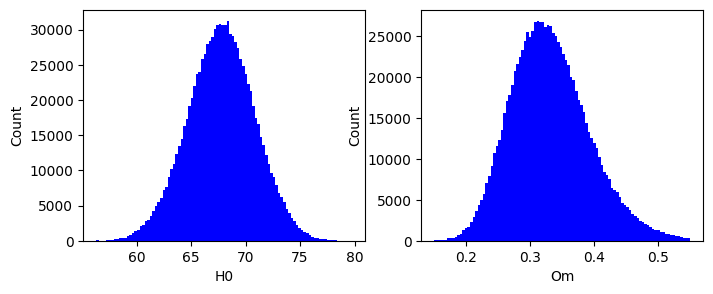

In [18]:
plt.figure(figsize=(8, 3)) #Plot Size

# Plot the histogram of a
plt.subplot(1, 2, 1)
plt.hist(h0_chain, bins=100, color='blue')
plt.xlabel('H0')
plt.ylabel('Count')

# Plot the histogram of b
plt.subplot(1, 2, 2)
plt.hist(om_chain, bins=100, color='blue')
plt.xlabel('Om')
plt.ylabel('Count')

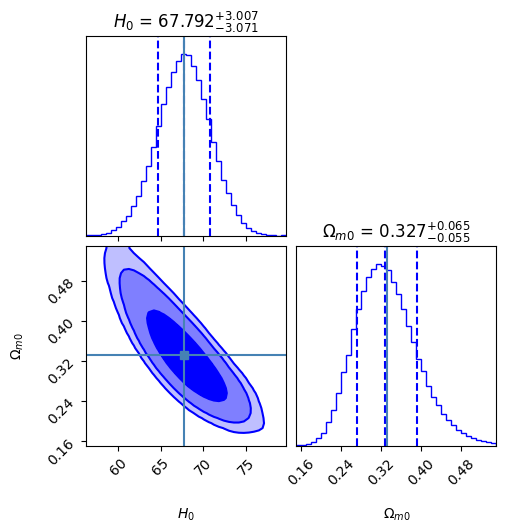

In [19]:
fig = corner.corner(samples_MH,bins=40,color="b",labels=['$H_0$','$\Omega_{m0}$'],truths=[h0_best,om_best],fill_contours=True,
                    levels=(0.68,0.95,0.99,),
                    smooth=True,
                    quantiles=[0.16, 0.5, 0.84],title_fmt='.3f',plot_datapoints=False,show_titles=True)